### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb


### Load data and check

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,movieId,count,rating
0,1,73,0.5
1,1,267,1.0
2,1,96,1.5
3,1,716,2.0
4,1,408,2.5


In [4]:
df.shape

(88255, 3)

### Split the data

In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [6]:
X.head()

,movieId,count
0,1,73
1,1,267
2,1,96
3,1,716
4,1,408


In [7]:
y.head()

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
Name: rating, dtype: float64

In [8]:
X.values,y.values

(array([[    1,    73],
        [    1,   267],
        [    1,    96],
        ...,
        [65133,     1],
        [65133,     1],
        [65133,     2]], dtype=int64),
 array([0.5, 1. , 1.5, ..., 2.5, 3. , 5. ]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((70604, 2), (17651, 2))

### Model Training

In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

In [12]:
xg_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

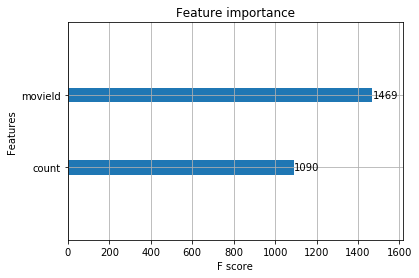

In [13]:
xgb.plot_importance(xg_reg)
plt.show()

In [14]:
preds = xg_reg.predict(X_test)

In [15]:
preds

array([2.920823 , 3.6077838, 3.3092606, ..., 3.2150764, 2.7173853,
       2.7056296], dtype=float32)

### Model Evaluation

In [16]:
mse = mean_squared_error(y_test, preds)
mse
print("MSE returned is", mse.round(4))

MSE returned is 1.822


In [17]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse
print("RMSE returned is", rmse.round(4))

RMSE returned is 1.3498


In [18]:
r2 = r2_score(y_test, preds)
r2
print("R2 returned is", r2.round(4) * 100)

R2 returned is 5.48
